<a href="https://colab.research.google.com/github/timlok123/Learning-the-basic-of-AI-with-Python/blob/main/Ch5_Basic_of_trainning_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ch5-Basic of trainning neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In the following of the notebook, we are going to build a simple neural network with 1-3-1 structure. The layer refers to the connection in between the node.

(add the choice of activation function, loss function, optimization methods and batch here)
(The tasks of the neural network)

Output layer

(Add the explantion to the backward propagation of the output layer here)

In [7]:
class Outputlayer:

    def __init__(self, m, n):
        WIDTH_CONST = 0.01  # the initial weigh is better to be in this order of magnitude

        self.w2 = WIDTH_CONST * np.random.rand(m,n)
        self.b2 = WIDTH_CONST * np.random.rand(n)

    def forward(self,y1):
      self.y1 = y1

      # u = YW + b
      u2 = np.dot(y1, self.w2) + self.b2

      # activation function for output layer is linear function 
      self.y2 = u2

    def backward(self, t):
      delta2 = self.y2 - t

      self.grad_w2 = np.dot(self.y1.T, delta2)
      self.grad_b2 = np.sum(delta2, axis=0)

      self.grad_y1 = np.dot(delta2, self.w2.T)

    def update(self,eta):
      self.w2 -= eta * self.grad_w2
      self.b2 -= eta * self.grad_b2


Middle layer

- Activation function: Sigmoid function


(Explain why does the activation function looks like this)

In [10]:
class Middlelayer:

    def __init__(self, m, n):
        WIDTH_CONST = 0.01  # the initial weigh is better to be in this order of magnitude

        self.w1 = WIDTH_CONST * np.random.rand(m,n)
        self.b1 = WIDTH_CONST * np.random.rand(n)

    def forward(self,x):
      self.x = x

      # u = YW + b
      u1 = np.dot(x, self.w1) + self.b1

      # activation function for middle layer is sigmoid function 
      self.y1 = 1/(1 + np.exp(-u1))

    def backward(self, grad_y1):
      delta1 = grad_y1 * (1 - self.y1) * self.y1
    
      self.grad_w1 = np.dot(self.x.T, delta1)
      self.grad_b1 = np.sum(delta1, axis=0)

    def update(self,eta):
      self.w1 -= eta * self.grad_w1
      self.b1 -= eta * self.grad_b1

Construct the neural network

In [20]:
# Training data preparation

input_data = np.arange(0, 2*np.pi, 0.1)
correct_data = np.sin(np.arange(0, 2*np.pi, 0.1))
input_data_normalized = (input_data - np.pi)/np.pi  # To control the data to be lying between -1 to 1
no_of_data = len(input_data)

# Hyperparameters tuning

n_in = 1
n_mid = 3
n_out = 1

eta = 0.1
epoch = 2000
interval = 200 

# Initialize the model

middle_layer = Middlelayer(n_in, n_mid)
output_layer = Outputlayer(n_mid, n_out)

# Training process

for i in range(epoch):

    # Shuffle the index randomly
    random_index = np.arange(0,no_of_data)
    np.random.shuffle(random_index)

    for idx in random_index:

      input_x = input_data_normalized[idx]
      label_t = correct_data[idx]

      # Forward propagation
      middle_layer.forward(input_x.reshape(1,1)) # Arrange the no of data in rows 
      output_layer.forward(middle_layer.y1)

      # Backward propagation
      output_layer.backward(label_t.reshape(1,1)) # Arrange the no of label in rows 
      middle_layer.backward(output_layer.grad_y1)

      # Update eta
      middle_layer.update(eta)
      output_layer.update(eta)   

    if (i%interval==0): print(f"Complete the {i+interval} epoch") 

Complete the 200 epoch
Complete the 400 epoch
Complete the 600 epoch
Complete the 800 epoch
Complete the 1000 epoch
Complete the 1200 epoch
Complete the 1400 epoch
Complete the 1600 epoch
Complete the 1800 epoch
Complete the 2000 epoch


In [21]:
# Demonstrate the result after training - Put the corresponding input to the model & plot the output

middle_layer.forward(input_data_normalized.reshape(-1,1))
output_layer.forward(middle_layer.y1)
plot_y2 = output_layer.y2.reshape(-1) 

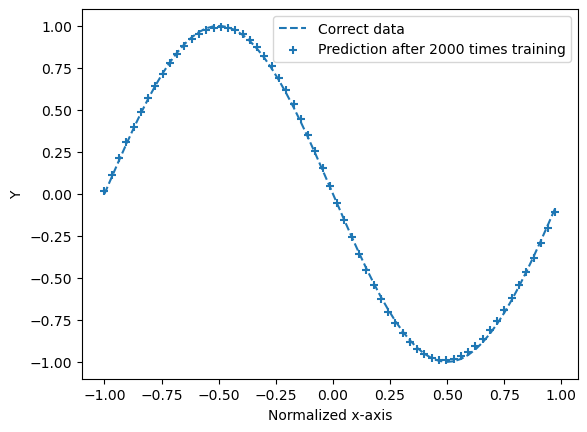

In [24]:
# Plot the graph 

plt.plot(input_data_normalized, correct_data, linestyle='dashed', label='Correct data')
plt.scatter(input_data_normalized, plot_y2, marker='+', label='Prediction after 2000 times training')
plt.xlabel('Normalized x-axis')
plt.ylabel('Y')
plt.legend()